<a href="https://colab.research.google.com/github/zeze1004/AI/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import csv
import torch
import torch.optim as optim
import csv
import torch.nn as nn

wine_path = "https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/tabular-wine/winequality-white.csv"
#wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype = np.float32, delimiter = ";", skiprows = 1)
wine_data = pd.read_csv(wine_path, delimiter=';')
wineq_numpy.shape

wineq = torch.from_numpy(wineq_numpy)
wineq.shape # columns and rows
wineq.dtype

wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [9]:
# quality 제거
data = wineq[:, :-1] 
data

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])

In [11]:
# quality data를 target으로 설정
target = wineq[:, -1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

In [12]:
# target을 onehot vector로 만듦
onehot_target = torch.zeros(target.shape[0],10)
onehot_target.scatter_(1, target.unsqueeze(1),1.0)
target = onehot_target
target

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [13]:
n_samples = data.shape[0]
n_samples
# validation data 
n_val = int(0.2 * n_samples)

In [16]:
shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([ 477, 3567, 4600,  ..., 4366,  657, 1734])

In [60]:
# training data, validation data 분리
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

target_train = target[train_indices]
data_train = data[train_indices]
target_val = target[val_indices]
data_val = data[val_indices]


In [61]:
# 트레이닝 루프
import torch.nn as nn
def training_loop(n_epochs, optimizer, model, loss_fn, data_train, data_val,
                  target_train, target_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(data_train) # <1>
        loss_train = loss_fn(t_p_train, target_train)
        t_p_val = model(data_val) 
        loss_val = loss_fn(t_p_val, target_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

# roop
linear_model = nn.Linear(11, 10)
learning_rate = 1e-6
optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), 
    data_train = data_train,
    data_val = data_val, 
    target_train = target_train,
    target_val = target_val)


Epoch 1, Training loss 506.2693, Validation loss 494.6273
Epoch 500, Training loss 12.0573, Validation loss 10.9898
Epoch 1000, Training loss 6.4751, Validation loss 5.8221
Epoch 1500, Training loss 6.2328, Validation loss 5.6337
Epoch 2000, Training loss 6.0543, Validation loss 5.4791
Epoch 2500, Training loss 5.8824, Validation loss 5.3274
Epoch 3000, Training loss 5.7161, Validation loss 5.1804
Epoch 3500, Training loss 5.5554, Validation loss 5.0383
Epoch 4000, Training loss 5.4001, Validation loss 4.9009
Epoch 4500, Training loss 5.2499, Validation loss 4.7681
Epoch 5000, Training loss 5.1047, Validation loss 4.6396


In [41]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model, lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

TypeError: ignored

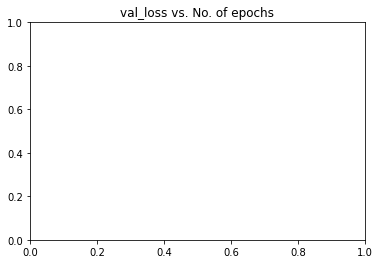

In [53]:
import matplotlib.pyplot as plt
plt.title('val_loss vs. No. of epochs');
n_epochs = 5000
loss_fn = nn.MSELoss()
loss_val = loss_fn(model(data_val), target_val)

def loss_mat(data_val, target_val):
  for i in range(1, 5001):
    loss_val(model(data_val), target_val)
     
plt.plot(loss_mat(model(data_val), target_val), '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [ ]:
# 종속변수/입력변수 나누기
x = wine_data.iloc[:,0:11]
y = wine_data['quality']

In [ ]:
# 라이브러리 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# 출력할때 warning 안뜨게하기

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('default')

In [ ]:
# 모델 학습
model = RandomForestClassifier(criterion='entropy',
                               n_estimators=3,oob_score=True)

model.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# 모델 예측 및 정확도 확인
y_pred = model.predict(x)
print(classification_report(y,y_pred))
print("정답률=",accuracy_score(y,y_pred))


              precision    recall  f1-score   support

           3       0.68      0.75      0.71        20
           4       0.78      0.91      0.84       163
           5       0.92      0.94      0.93      1457
           6       0.94      0.94      0.94      2198
           7       0.93      0.89      0.91       880
           8       0.95      0.82      0.88       175
           9       1.00      0.60      0.75         5

    accuracy                           0.92      4898
   macro avg       0.89      0.84      0.85      4898
weighted avg       0.92      0.92      0.92      4898

정답률= 0.9236423029808085


In [ ]:
# 모델안에 몇번째거를 그릴건지를 넣어야한다.

estimator = model.estimators_[0]

dot_data = export_graphviz(estimator, out_file=None,

                           feature_names=x.columns,

                           class_names=['q3','q4','q5','q6','q7','q8','q9'],

                           filled=True, rounded=True,

                           special_characters=True)

In [56]:
# 그래프 그리기
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from pydotplus import graph_from_dot_data
import os
from PIL import Image


graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

TypeError: ignored

In [ ]:
# 모델학습
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 모델 예측
y_pred = model.predict(x)
y_pred

array([5, 5, 6, ..., 6, 6, 6])

In [ ]:
# 정확도 확인
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.5195998366680278

In [ ]:
# 그래프 설정
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file = None,
                           feature_names = x.columns,
                           class_names =
                           ['q3','q4','q5','q6','q7','q8','q9'],
                           filled = True, rounded = True,
                           special_characters = True)

In [54]:
# 그래프 그리기

graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
def plot_figure(index,column):
  plt.subplot(6,2,index)
  plt.title(column)
  plt.plot(wine_data[column])

  plt.figure(figsize=(10,10))


plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [ ]:
wine = wine_data[0:130] # 설명변수
wine_target = wine_data.target[0:130] # 목적변수

AttributeError: ignored